# Figure 12 NRMSE, Calibration Error and accuracy lineplot next to scale-averaged bar plots

In [1]:
import pandas as pd

metrics = ["nrmse", "ce", "clg"]
phases = ["train", "val"]
parameters = ["alpha", "logstd"]
shapes = [8, 16, 32, 64, 128, 256]
model_types = ["diffusion_edm_vp", "flow_matching", "consistency_model"]
modes = ["online", "offline"]
post_run_summary_file = "summary_post.csv" # downloaded from wandb

df = pd.read_csv(post_run_summary_file)
df["dataset.shape"] = df["dataset.shape"].apply(lambda x: int(x[1:-1].split(",")[0]))
df_post = df.drop([
    "model.summary_kwargs.widths",
    "model.summary_kwargs.summary_dim",
    "model.subnet_kwargs.widths",
], axis=1)
df_post = df.rename(columns={
    "Name": "wandb_name",
    "dataset.shape": "shape",
    "model.model_name": "model_type",
    "validation/nrmse_alpha": "val_nrmse_alpha",
    "validation/nrmse_logstd": "val_nrmse_logstd",
    "train/nrmse_alpha": "train_nrmse_alpha",
    "train/nrmse_logstd": "train_nrmse_logstd",
    "validation/ce_alpha": "val_ce_alpha",
    "validation/ce_logstd": "val_ce_logstd",
    "train/ce_alpha": "train_ce_alpha",
    "train/ce_logstd": "train_ce_logstd",
    "validation/clg_alpha": "val_clg_alpha",
    "validation/clg_logstd": "val_clg_logstd",
    "train/clg_alpha": "train_clg_alpha",
    "train/clg_logstd": "train_clg_logstd",
})
df_post.head()

,wandb_name,shape,model_type,val_nrmse_alpha,val_nrmse_logstd,val_ce_alpha,val_ce_logstd,val_clg_alpha,val_clg_logstd,model.summary_kwargs.widths,model.summary_kwargs.summary_dim,model.subnet_kwargs.widths,training.mode,training.total_samples,train_ce_alpha,train_ce_logstd,train_clg_alpha,train_clg_logstd,train_nrmse_alpha,train_nrmse_logstd
0,youthful-sun-144,256,diffusion_edm_vp,0.0085,0.0093,0.0177,0.0517,2.2116,-5.3793,"[16,16,16,16]",8,"[64,64,64]",offline,78000,0.0843,0.1024,-3.8540,-12.3807,0.0083,0.0085
1,dauntless-music-143,256,flow_matching,0.0107,0.0121,0.1226,0.1761,-10.9341,-13.7024,"[16,16,16,16]",8,"[64,64,64]",offline,78000,0.1335,0.1895,-9.6996,-20.0718,0.0109,0.0111
2,robust-firebrand-142,256,consistency_model,0.0125,0.0183,0.1418,0.2942,-19.3857,NaN,"[16,16,16,16]",8,"[64,64,64]",offline,78000,0.1664,0.2962,-23.3159,NaN,0.0128,0.0172
3,floral-frog-141,256,diffusion_edm_vp,0.0088,0.0096,0.0345,0.0923,1.1690,-6.8051,"[16,16,16,16]",8,"[64,64,64]",online,78000,NaN,NaN,NaN,NaN,NaN,NaN
4,jolly-silence-140,256,flow_matching,0.0108,0.0130,0.0877,0.1859,-8.6376,-13.5307,"[16,16,16,16]",8,"[64,64,64]",online,78000,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import os
import pandas as pd
import numpy as np

metrics = ["accuracy"]
phases = ["val"]
parameters = ["field"]
model_types = ["diffusion_edm_vp", "flow_matching", "consistency_model"]
modes = ["online", "offline"]
like_run_summary_file = "summary_like.csv"

df_like = pd.read_csv(like_run_summary_file)
df_like["dataset.shape"] = df_like["dataset.shape"].apply(lambda x: int(x[1:-1].split(",")[0]))
df_like = df_like.rename(columns={
    "Name": "wandb_name",
    "dataset.shape": "shape",
    "model.model_name": "model_type",
    "training.mode": "mode",
})
parameter = "field"
all_classifier_results = []
for runidx, row in df_like.iterrows():
    proj_dir = os.path.join(f"{row["model_type"]}", "NLE", f"{row["shape"]}", row["wandb_name"])
    try:
        classifier_results = pd.read_json(os.path.join(proj_dir, f"classifier_results_{parameter}.json"))
        all_classifier_results.append(classifier_results["classifier-result"].values[0])
    except FileNotFoundError:
        all_classifier_results.append(np.nan)
        print(f"File not found for {proj_dir}")
df_like[f"val_accuracy_{parameter}"] = all_classifier_results
df_like.head()

,wandb_name,shape,mode,model_type,val_accuracy_field
0,happy-morning-116,128,offline,diffusion_edm_vp,0.500
1,fast-butterfly-115,128,offline,consistency_model,0.993
2,golden-bush-114,128,offline,flow_matching,0.965
3,devout-capybara-113,128,online,diffusion_edm_vp,0.819
4,expert-morning-112,128,online,consistency_model,1.000


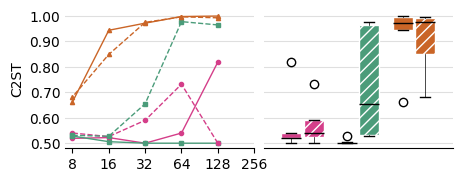

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches


colors_by_type = {
    "diffusion_edm_vp": "#d43e89",
    "flow_matching": "#4b9c7a",
    "consistency_model": "#ca6527",
}

model_types_labels_by_type = {
    "diffusion_edm_vp": "VP EDM",
    "flow_matching": "Flow Matching",
    "consistency_model": "Consistency Model",
}
markers_by_type = {
    "diffusion_edm_vp": "o",
    "flow_matching": "s",
    "consistency_model": "^",
}
linestyles_by_mode = {
    "online": "solid",
    "offline": "dashed",
}
labels_by_mode = {
    "online": "High Budget",
    "offline": "Low Budget",
}
metric_labels = {
    "nrmse": "NRMSE",
    "ce": "Calibration Error",
    "accuracy": "C2ST",
}

hatches_by_mode = {
    "online": "",
    "offline": "///",
}
yticks_by_metric = {
    "nrmse": [0.0, 0.05, 0.10, 0.15],
    "ce": [0.0, 0.05, 0.10, 0.15, 0.20],
    "clg": [0, 5, 10, 15, 20],
    "accuracy": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
shapes = [8, 16, 32, 64, 128, 256]
phase = "val"
metrics = ["accuracy"] # <- replace "accuracy" with "nrmse" or "ce" to plot one of the other two
yticklabels_by_metric = {
    metric: [tick for tick in yticks_by_metric[metric]] for metric in metrics
}
fig, axs = plt.subplot_mosaic([[f"line_{metric}", f"box_{metric}"] for metric in metrics],
                              figsize=(2*2.5*len(metrics), 1.8),
                              sharey=True,
                              gridspec_kw={
                                  "wspace": 0.05,
                                  "hspace": 0.00,
                              })

for m, metric in enumerate(metrics):
    ylim = 0.48 if metric == "accuracy" else 0.0
    ax = axs[f"box_{metric}"]
    groups = model_types
    n_modes = len(modes)

    x = np.arange(len(groups))
    cluster_width = 0.8
    box_width = cluster_width / n_modes
    offsets = (np.arange(n_modes) - (n_modes - 1) / 2) * box_width

    model_handles = [mpatches.Patch(facecolor=colors_by_type[m], label=m) for m in model_types]
    mode_handles  = [mpatches.Patch(facecolor="white", edgecolor="k", hatch=hatches_by_mode[mo], label=mo) for mo in modes]
    for i, model_type in enumerate(model_types):
        for j, mode in enumerate(modes):
            if metric not in ["accuracy"]:
                subset = df_post[(df_post["model_type"] == model_type) & (df_post["mode"] == mode)]
                cat_data = [(np.abs(subset[f"{phase}_{metric}_alpha"]) + np.abs(subset[f"{phase}_{metric}_logstd"])) / 2]
            else:
                subset = df_like[(df_like["model_type"] == model_type) & (df_like["mode"] == mode)]
                cat_data = [subset[f"{phase}_{metric}_field"]]

            pos = x[i] + offsets[j]
            bp = ax.boxplot(
                cat_data,
                positions=[pos],
                widths=box_width * 0.9,
                patch_artist=True,
                medianprops=dict(linewidth=1, color='k'),
                whiskerprops=dict(linewidth=0.5),
                capprops=dict(linewidth=1),
                boxprops=dict(linewidth=0),
                showfliers=True,
            )
            # set box colors
            for box in bp["boxes"]:
                box.set(
                    facecolor=colors_by_type[model_type],
                    hatch=hatches_by_mode[mode],
                    edgecolor="w",
                    linewidth=1.,
                )

    ax.set_xticks([])
    ax.set_yticks(yticks_by_metric[metric], yticklabels_by_metric[metric])
    ax.tick_params(axis="y", which="major", size=0)
    if metric != "clg":
        ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:01.2f}"))
    ax.grid(axis="y", alpha=0.4)
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.set_ylim(ymin=ylim)

    ax = axs[f"line_{metric}"]
    for mode in modes:
        for model_type in model_types:
            if metric not in ["accuracy"]:
                subset = df_post[(df_post["model_type"] == model_type) & (df_post["mode"] == mode)]
                x = subset["shape"]
                y1 = np.abs(subset[f"{phase}_{metric}_alpha"])
                y2 = np.abs(subset[f"{phase}_{metric}_logstd"])
                y = (y1 + y2) / 2
                if metric == "accuracy":
                    y = subset[f"{phase}_{metric}_joint"]
                ax.plot(
                    x, y,
                    label=model_types_labels_by_type[model_type],
                    marker=markers_by_type[model_type],
                    markersize=3,
                    color=colors_by_type[model_type],
                    linestyle=linestyles_by_mode[mode],
                    linewidth=1,
                )
            else:
                subset = df_like[(df_like["model_type"] == model_type) & (df_like["mode"] == mode)]
                x = subset["shape"]
                y = subset[f"{phase}_{metric}_field"].values
                ax.plot(
                    x, y,
                    label=model_types_labels_by_type[model_type],
                    marker=markers_by_type[model_type],
                    markersize=3,
                    color=colors_by_type[model_type],
                    linestyle=linestyles_by_mode[mode],
                    linewidth=1,
                )

    ax.set_xscale("log", base=2)
    ax.set_xticks(shapes)
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.grid(axis="y", alpha=0.4)
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_ylabel(f"{metric_labels[metric]}")
    ax.set_ylim(ymin=ylim)
    ax.tick_params(axis="y", size=0)

handles = [
    mpatches.Patch(facecolor="k", label=f"{labels_by_mode[mode]}", hatch=hatches_by_mode[mode], edgecolor="w") for mode in modes
]
handles += [
    mpatches.Patch(facecolor=colors_by_type[model_type], label=f"{model_types_labels_by_type[model_type]}") for model_type in model_types
]
labels = [labels_by_mode[mode] for mode in modes]
labels += [model_types_labels_by_type[model_type] for model_type in model_types]
#plt.savefig(f"line_box-average-scale_{metric}_val.pdf", bbox_inches='tight', transparent=True)
plt.show()

# sampling fields from approximator checkpoints

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
os.environ["KERAS_BACKEND"] = "jax"
import bayesflow as bf
import keras

from FyeldGenerator import generate_field

import padded_unet
from tqdm.notebook import tqdm

INFO:2026-01-06 10:39:30,034:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:bayesflow:Using backend 'jax'


0it [00:00, ?it/s]

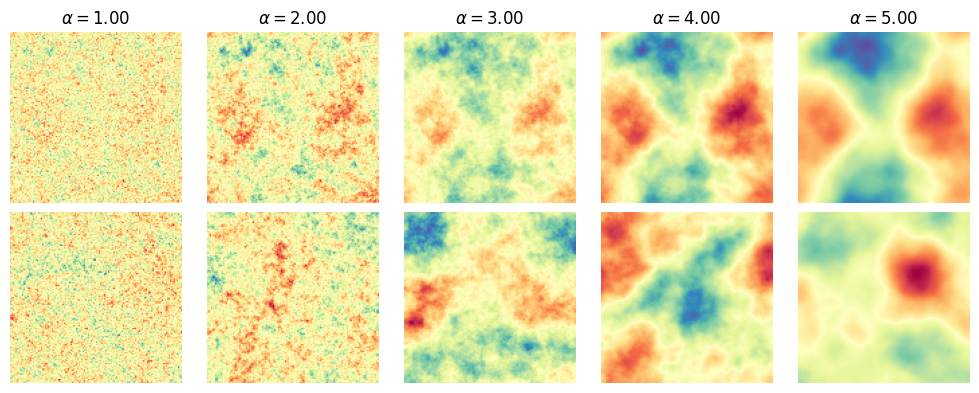

In [5]:
def generate_power_spectrum(alpha, scale):
    def power_spectrum(k):
        base = np.power(k, -alpha) * scale**2
        return base
    return power_spectrum

def plot_distribution(shape):
    rng = np.random.default_rng(seed=1234123)
    a = rng.normal(loc=0, scale=1., size=shape)
    b = rng.normal(loc=0, scale=1., size=shape)
    return a + 1j * b

cmap = "Spectral"
figure_dir = "figures_field_samples_dir"
os.makedirs(figure_dir, exist_ok=True)
for runidx, row in tqdm(df_like.iterrows()):
    proj_dir = os.path.join(f"{row["model_type"]}", "NLE", f"{row["shape"]}", row["wandb_name"])
    ckpt_dir = os.path.join(proj_dir, "checkpoints")
    ckpt_approx_file_path = os.path.join(ckpt_dir, f"{row["wandb_name"]}.keras")

    approximator = keras.saving.load_model(ckpt_approx_file_path)
    shape = (row["shape"], row["shape"])
    n_examples = 5
    alphas = np.linspace(1, 5, n_examples)
    log_std = 0
    simulator_spectra = [generate_power_spectrum(alpha, np.exp(log_std)) for alpha in alphas]
    fields_simulated = np.stack([generate_field(plot_distribution, spectra, shape, unit_length=1/(np.abs(alpha)+1e-7)) for (alpha, spectra) in zip(alphas, simulator_spectra)], axis=0)

    params_expanded = []
    for alpha in alphas:
        param_expanded = np.array([log_std, alpha])
        params_expanded.append(np.ones(shape + (2,)) * param_expanded[None, None, :])
    params_expanded = np.stack(params_expanded, axis=0)
    z = keras.random.normal((n_examples, row["shape"], row["shape"], 1))
    conditions = keras.ops.convert_to_tensor(params_expanded, dtype="float32")
    fields_generated = approximator.inference_network(z, conditions=conditions, inverse=True)
    fields_generated = keras.ops.convert_to_numpy(fields_generated)
    fig, axs = plt.subplots(2, n_examples, figsize=(n_examples * 2, 4))
    for i, (field_gen, field_sim, alpha) in enumerate(zip(fields_generated, fields_simulated, alphas)):
        a = axs[0, i].imshow(field_sim, cmap=cmap, vmin=np.minimum(field_sim.min(), field_gen.min()), vmax=np.maximum(field_sim.max(), field_gen.max()))
        axs[0, i].set_title(rf"$\alpha={alpha:.2f}$")
        b = axs[1, i].imshow(field_gen[:, :, 0], cmap=cmap, vmin=np.minimum(field_sim.min(), field_gen.min()), vmax=np.maximum(field_sim.max(), field_gen.max()))
    axs[0, 0].set_ylabel("Simulator")
    axs[1, 0].set_ylabel("Posterior")
    for ax in axs.flat:
        ax.set_axis_off()
        ax.set_aspect("equal")
    plt.tight_layout()
    #plt.savefig(os.path.join(figure_dir, f"cs3_grf_fields_{row["shape"]}_{row["model_type"]}_{row["mode"]}_{row["wandb_name"]}.pdf"), bbox_inches='tight')
    plt.show()
    break # remove to evaluate all runs